In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

In [ ]:
pd.set_option('display.max_columns', None)

#####  Создаем DF

In [ ]:
columns=['id',
 'objReady100PercDt',
 'wallMaterialShortDesc',
 'objLkFinishTypeDesc',
 'region',
 'developer.regRegionDesc',
 'objElemParkingCnt',
 'objSquareLiving',
 'objProblemFlg',
 'objLkClassDesc',
 'objectType',
 'objFloorCnt',
 'objFlatCnt',
 'objFlatSq',
 'objNonlivElemCnt',
 'objStatus',
 'objInfrstrObjPrkngCnt',
 'objInfrstrNotObjPrkngCnt',
 'objElevatorPassengerCnt',
 'objElevatorCargoCnt',
 'objElevatorCargoPassengerCnt',
 'soldOutPerc',
 'objPriceAvg',
 'nonlivFirstFloor']

In [ ]:
df=pd.read_pickle('build.pkl')[columns].drop_duplicates('id')
df['date']=pd.to_datetime(df['objReady100PercDt'])
live_class = df['objLkClassDesc'].unique()
region = df['region'].unique() 

##### отбираем все классы жилья и регион, и в дальнейшем заменяем Nan цены на медиану по каждому классу объекта

In [ ]:
for cla in a:
    for reg in region:
        filter = (df['objLkClassDesc'] == cla) & (df['region'] == reg)
        df.loc[filter,'price'] = df.loc[filter,'objPriceAvg'].fillna(df.loc[filter,'objPriceAvg'].mean())

In [ ]:
top_reg=df.groupby(['region']).count().sort_values('price',ascending=False).reset_index().head(10)['region']
test=df[df['region'].isin(top_reg)][['region','objElemParkingCnt','objFloorCnt','objFlatCnt','objFlatSq','price','date','objLkClassDesc']]

In [ ]:
t2=test[test['region'].isin([78])]
t2['date']=t2['date'].dt.year
t2=t2.groupby(['date','objLkClassDesc'])['price'].mean().reset_index()

In [ ]:
t2['date']

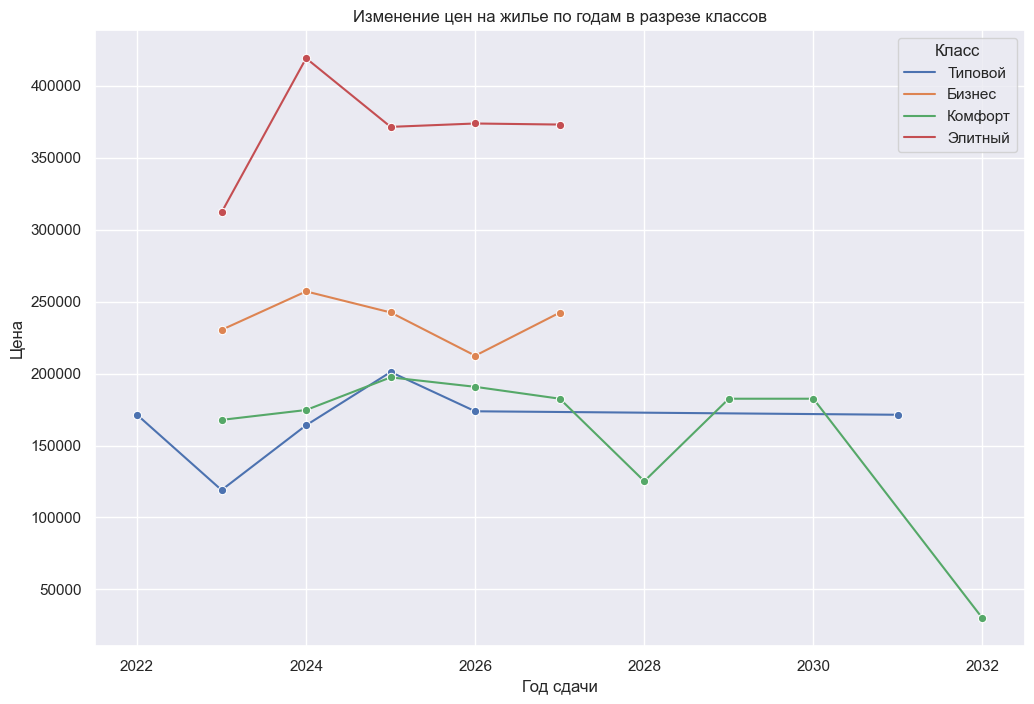

In [1166]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='price', hue='objLkClassDesc', data=t2, marker='o')
plt.title('Изменение цен на жилье по годам в разрезе классов')
plt.xlabel('Год сдачи')
plt.ylabel('Цена')
plt.legend(title='Класс')
plt.show()

In [ ]:
t2=test[test['region'].isin([78])]
t2['date']=t2['date'].dt.year
t2=t2.groupby(['date','objLkClassDesc'])['price'].count().reset_index()

In [1171]:
t3=test
t3['date']=t3['date'].dt.year
t3=t3.groupby(['date','region'])['objFloorCnt'].mean().reset_index()

AttributeError: Can only use .dt accessor with datetimelike values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


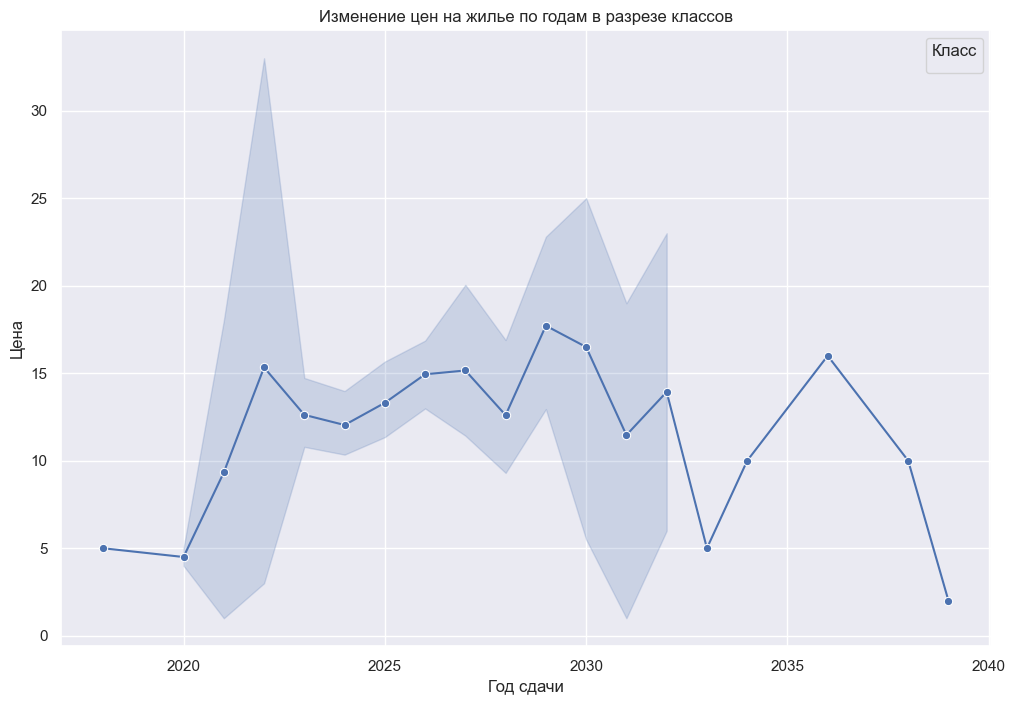

In [1170]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='objFloorCnt',  data=t3, marker='o')
plt.title('Изменение цен на жилье по годам в разрезе классов')
plt.xlabel('Год сдачи')
plt.ylabel('Цена')
plt.legend(title='Класс')
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
t2.plot(kind='barh')
plt.show()

## цены по регионам

In [ ]:
df['year']=pd.to_datetime(df['objReady100PercDt']).dt.to_period('Q')

In [ ]:
df

In [ ]:
df[['year','price']].sort_index(ascending=False).plot(kind='barh')
plt.show()

In [ ]:
top_reg=df.groupby(['region']).count().sort_values('price',ascending=False).reset_index().head(10)['region']

In [ ]:
top_reg

In [ ]:
test=test[test['region'].isin([78,54,30,77,23])]

In [ ]:
df[df['region'] == 54]

In [ ]:
df[df['region']==50]

In [ ]:
test